# LINEAR REGRESSION

In [40]:
import warnings
warnings.simplefilter('ignore')

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
%matplotlib inline

In [42]:
LR=pd.read_csv("C:\\Users\\varsh\\Downloads\\chocolates.csv")

In [43]:
LR

,Name,MFR,Country,Type,Calories,CalFat,TotFat,SatFat,Chol,Na,Carbs,Fiber,Sugars,Protein
0,Noir 86% Cacao,Cote D'Or,Belgium,Dark,460.000000,380.000000,44.000000,26.000000,0.000000,0.000000,28.000000,10.000000,10.000000,8.000000
1,70% Cocoa,Cote D'Or,Belgium,Dark,600.000000,432.000000,48.000000,30.000000,10.000000,0.000000,42.000000,10.000000,28.000000,8.000000
2,Solid Dark Chocolate Bar,Godiva,Belgium,Dark,534.883721,302.325581,32.558140,20.930233,0.000000,0.000000,60.465116,9.302326,46.511628,6.976744
3,72% Extra Dark Chocolate,Godiva,Belgium,Dark,534.883721,348.837209,39.534884,20.930233,0.000000,81.395349,41.860465,13.953488,27.906977,9.302326
4,Extra Dark Chocolate Bar,Guylian,Belgium,Dark,575.757576,333.333333,39.393939,24.242424,0.000000,90.909091,48.484848,12.121212,33.333333,9.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Milk Chocolate Square,Ghiradelli,US,Milk,475.000000,250.000000,27.500000,15.000000,12.500000,37.500000,62.500000,5.000000,52.500000,5.000000
84,Symphony Milk Chocolate Bar,Hershey's,US,Milk,530.952381,276.190476,30.476191,18.333333,23.809524,100.000000,58.095238,1.666667,54.047619,8.571429
85,35% Cacao Premium Milk,Hershey's,US,Milk,550.000000,325.000000,37.500000,22.500000,25.000000,75.000000,52.500000,2.500000,50.000000,7.500000
86,41% Cacao Milk Chocolate,Scharffen Berger,US,Milk,465.116279,302.325581,32.558140,20.930233,23.255814,116.279070,48.837209,4.651163,41.860465,7.233327


In [44]:
LR.shape

(88, 14)

In [45]:
LR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      88 non-null     object 
 1   MFR       88 non-null     object 
 2   Country   88 non-null     object 
 3   Type      88 non-null     object 
 4   Calories  88 non-null     float64
 5   CalFat    88 non-null     float64
 6   TotFat    88 non-null     float64
 7   SatFat    88 non-null     float64
 8   Chol      88 non-null     float64
 9   Na        88 non-null     float64
 10  Carbs     88 non-null     float64
 11  Fiber     88 non-null     float64
 12  Sugars    88 non-null     float64
 13  Protein   88 non-null     float64
dtypes: float64(10), object(4)
memory usage: 9.8+ KB


In [46]:
dataset=LR.drop(['Name','MFR','Country','Type','CalFat','SatFat','Chol','Na','Carbs','Fiber','Sugars','Protein'],axis=1)

In [47]:
dataset

,Calories,TotFat
0,460.000000,44.000000
1,600.000000,48.000000
2,534.883721,32.558140
3,534.883721,39.534884
4,575.757576,39.393939
...,...,...
83,475.000000,27.500000
84,530.952381,30.476191
85,550.000000,37.500000
86,465.116279,32.558140


In [48]:
x=dataset.iloc[:,0].values.reshape(-1,1)
y=dataset.iloc[:,1].values.reshape(-1,1)

In [49]:
x

array([[460.      ],
       [600.      ],
       [534.883721],
       [534.883721],
       [575.757576],
       [575.757576],
       [571.428571],
       [585.714286],
       [578.947368],
       [600.      ],
       [640.      ],
       [640.      ],
       [580.      ],
       [605.263158],
       [575.      ],
       [600.      ],
       [558.      ],
       [506.666667],
       [558.139535],
       [500.      ],
       [539.795918],
       [400.      ],
       [556.122449],
       [577.777778],
       [640.      ],
       [484.848485],
       [560.      ],
       [550.      ],
       [534.285714],
       [700.      ],
       [551.      ],
       [570.      ],
       [559.      ],
       [559.      ],
       [610.      ],
       [473.684211],
       [571.428571],
       [514.285714],
       [514.905149],
       [600.      ],
       [515.151515],
       [511.627907],
       [511.627907],
       [450.      ],
       [575.      ],
       [439.02439 ],
       [465.116279],
       [560.9

In [50]:
y

array([[44.       ],
       [48.       ],
       [32.5581395],
       [39.5348837],
       [39.3939394],
       [33.3333333],
       [37.1428571],
       [40.       ],
       [36.8421053],
       [42.       ],
       [50.       ],
       [50.       ],
       [40.       ],
       [42.1052632],
       [40.       ],
       [42.       ],
       [44.6      ],
       [32.       ],
       [39.5348837],
       [32.5      ],
       [46.9387755],
       [35.       ],
       [43.622449 ],
       [35.5555556],
       [50.       ],
       [30.3030303],
       [42.4      ],
       [32.5      ],
       [38.8571429],
       [62.5      ],
       [41.1      ],
       [47.       ],
       [50.1      ],
       [50.1      ],
       [43.3333333],
       [35.0877193],
       [45.7142857],
       [37.1428571],
       [32.5203252],
       [40.       ],
       [33.3333333],
       [53.4883721],
       [44.1860465],
       [37.5      ],
       [37.5      ],
       [29.2682927],
       [32.5581395],
       [31.70

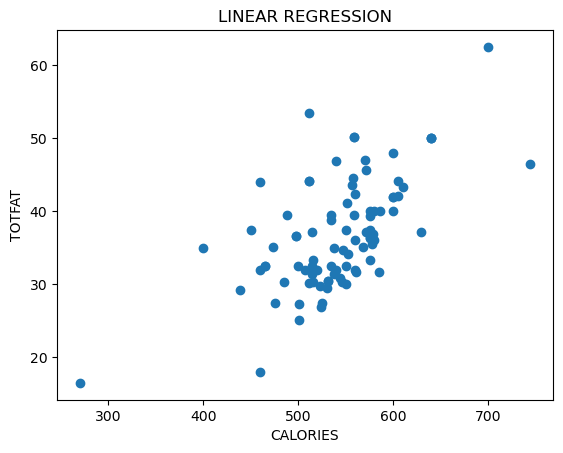

In [51]:
pt.scatter(x,y)
pt.xlabel('CALORIES')
pt.ylabel('TOTFAT')
pt.title('LINEAR REGRESSION')
pt.show()
        

In [52]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [55]:
X_train.shape

(70, 1)

In [56]:
X_test.shape

(18, 1)

In [57]:
Y_train.shape

(70, 1)

In [58]:
Y_test.shape

(18, 1)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lm=LinearRegression()

In [61]:
X_train

array([[497.142857],
       [511.627907],
       [556.122449],
       [571.428571],
       [560.      ],
       [567.567568],
       [546.666667],
       [488.372093],
       [585.365854],
       [270.      ],
       [628.571429],
       [534.883721],
       [580.      ],
       [550.      ],
       [550.      ],
       [558.139535],
       [537.5     ],
       [604.651163],
       [525.      ],
       [511.627907],
       [460.      ],
       [575.757576],
       [600.      ],
       [506.666667],
       [515.151515],
       [514.905149],
       [575.757576],
       [514.285714],
       [543.367347],
       [460.      ],
       [610.      ],
       [534.285714],
       [640.      ],
       [473.684211],
       [577.777778],
       [744.186047],
       [640.      ],
       [570.      ],
       [575.757576],
       [545.454545],
       [524.390244],
       [600.      ],
       [559.      ],
       [497.142857],
       [575.      ],
       [475.      ],
       [500.      ],
       [700. 

In [62]:
lm.fit(X_train,Y_train)

LinearRegression()

In [63]:
y_predict=lm.predict(X_test)

In [64]:
y_predict

array([[35.79150439],
       [41.20250212],
       [34.00352253],
       [34.00352253],
       [36.03109396],
       [37.03057582],
       [28.42153037],
       [29.2653706 ],
       [34.86686235],
       [34.647196  ],
       [39.6995219 ],
       [37.72252479],
       [37.64564157],
       [37.15601686],
       [39.17925946],
       [37.56875835],
       [43.87318239],
       [35.4160282 ]])

In [65]:
COM=pd.DataFrame(X_test,columns=['CALORIES'])

In [66]:
COM


,CALORIES
0,534.883721
1,605.263158
2,511.627907
3,511.627907
4,538.000000
5,551.000000
6,439.024390
7,450.000000
8,522.857143
9,520.000000


In [67]:
COM['AVLDATA']=Y_test

In [68]:
COM

,CALORIES,AVLDATA
0,534.883721,32.558140
1,605.263158,42.105263
2,511.627907,44.186047
3,511.627907,53.488372
4,538.000000,31.400000
5,551.000000,41.100000
6,439.024390,29.268293
7,450.000000,37.500000
8,522.857143,29.714286
9,520.000000,32.000000


In [69]:
COM['TOTFATDATA']=y_predict

In [70]:
COM

,CALORIES,AVLDATA,TOTFATDATA
0,534.883721,32.558140,35.791504
1,605.263158,42.105263,41.202502
2,511.627907,44.186047,34.003523
3,511.627907,53.488372,34.003523
4,538.000000,31.400000,36.031094
5,551.000000,41.100000,37.030576
6,439.024390,29.268293,28.421530
7,450.000000,37.500000,29.265371
8,522.857143,29.714286,34.866862
9,520.000000,32.000000,34.647196


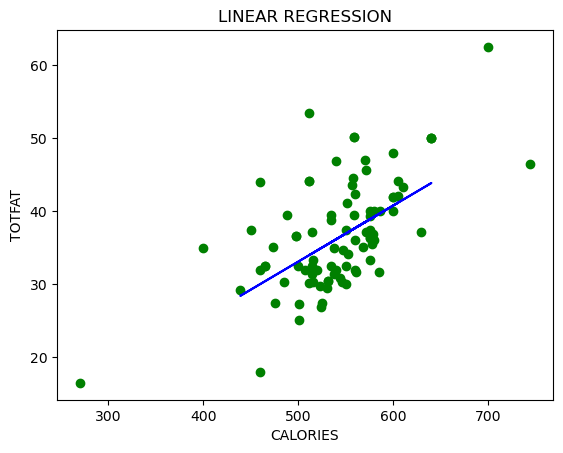

In [71]:
pt.scatter(x,y,color='green')
pt.plot(X_test,y_predict,color='blue')
pt.xlabel('CALORIES')
pt.ylabel('TOTFAT')
pt.title('LINEAR REGRESSION')
pt.show()

In [72]:
import pandas as pd

In [75]:
LR.to_csv("C:\\Users\\varsh\\Downloads\\chocolates linear regression.csv")